<a href="https://colab.research.google.com/github/clerisson-san/Analise_de_dados_com_Python_e_Pandas_by_DIO/blob/main/Pandas_Aula6_Visualizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Trabalhando com Planilhas do Excel**

In [2]:
#Importando a biblioteca
import pandas as pd

In [4]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [5]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#Exibindo as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
55,Aracaju,2018-01-01,67.23,1520,8
228,Natal,2019-01-02,6.87,1037,3
12,Recife,2019-01-01,17.48,982,2
68,Salvador,2019-01-01,162.35,1037,3
160,Natal,2019-01-02,11.76,1034,1


In [ ]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


**Tratando valores faltantes**

In [ ]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    7
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
df["Vendas"].mean()

122.9339571589626

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
216,Salvador,2019-01-02,5.82,1035,1
224,Natal,2019-01-02,178.30,1035,3
34,Recife,2019-01-01,24.97,980,5
74,Recife,2019-01-01,38.79,983,6
193,Natal,2019-01-02,3.97,1036,2
136,Natal,2019-01-02,13.81,1036,1
113,Fortaleza,2019-03-02,38.63,980,2
64,Fortaleza,2019-01-01,110.31,1005,4
121,Aracaju,2018-01-01,162.07,1520,3
6,Aracaju,2018-01-01,35.50,1522,2


In [ ]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [ ]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

**Criando colunas novas**

In [12]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [13]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"] 

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [ ]:
#Retornando a menor receita
df["Receita"].min()

0.0

In [ ]:
#nlargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
#nsamllest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Fortaleza,2019-02-11,0.0,1003,2,0.0,NaN
14,Fortaleza,2019-01-12,0.0,1005,1,0.0,NaN
34,Fortaleza,2019-01-01,0.0,1003,5,0.0,NaN


In [14]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [15]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


#**Trabalhando com datas**

In [16]:
#Trasnformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [ ]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [17]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [18]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [19]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
124,Salvador,2019-03-02,44.82,1034,3,134.46,3.0,2019
218,Salvador,2019-01-02,189.12,1036,3,567.36,3.0,2019
82,Aracaju,2018-01-01,150.48,1522,4,601.92,4.0,2018
29,Salvador,2019-01-01,9.27,1034,1,9.27,1.0,2019
123,Salvador,2019-03-02,127.45,1036,3,382.35,3.0,2019


In [27]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
97,Salvador,2019-01-01,39.91,1037,3,119.73,3.0,2019,1,1
12,Aracaju,2019-01-01,9.78,1520,8,78.24,8.0,2019,1,1
59,Natal,2018-01-15,369.00,853,2,738.00,2.0,2018,1,15
13,Natal,2018-09-12,458.00,852,4,1832.00,4.0,2018,9,12
16,Aracaju,2018-01-01,37.68,1522,10,376.80,10.0,2018,1,1


In [ ]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
104,Aracaju,2018-01-01,46.96,1522,1,46.96,1.0,2018,1,1,0 days
70,Recife,2019-01-01,20.40,983,7,142.80,7.0,2019,1,1,365 days
50,Salvador,2019-01-01,44.87,1036,3,134.61,3.0,2019,1,1,365 days
34,Recife,2019-01-01,24.97,980,5,124.85,5.0,2019,1,1,365 days
147,Salvador,2019-01-02,34.50,1035,1,34.50,1.0,2019,1,2,366 days


In [ ]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
85,Fortaleza,2019-01-01,149.00,1005,3,447.00,3.0,2019,1,1,365 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,1,1,0 days,1
54,Fortaleza,2019-01-01,16.73,1002,5,83.65,5.0,2019,1,1,365 days,1
81,Aracaju,2018-01-01,53.41,1520,2,106.82,2.0,2018,1,1,0 days,1
45,Fortaleza,2019-01-01,0.00,1004,3,0.00,NaN,2019,1,1,365 days,1


In [ ]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
125,Fortaleza,2019-03-02,37.60,983,4,150.40,4.0,2019,3,2,425 days,1
124,Fortaleza,2019-03-02,47.98,983,7,335.86,7.0,2019,3,2,425 days,1
115,Fortaleza,2019-03-02,12.23,981,3,36.69,3.0,2019,3,2,425 days,1
50,Natal,2019-03-08,324.00,854,4,1296.00,4.0,2019,3,8,431 days,1
126,Recife,2019-03-02,41.87,980,8,334.96,8.0,2019,3,2,425 days,1
125,Recife,2019-03-02,37.60,983,4,150.40,4.0,2019,3,2,425 days,1
140,Fortaleza,2019-03-02,166.89,983,5,834.45,5.0,2019,3,2,425 days,1
140,Recife,2019-03-02,166.89,983,5,834.45,5.0,2019,3,2,425 days,1
2,Natal,2019-03-11,308.00,852,3,924.00,3.0,2019,3,11,434 days,1
131,Salvador,2019-03-02,63.48,1037,3,190.44,3.0,2019,3,2,425 days,1


#**Visualização de dados**

In [6]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

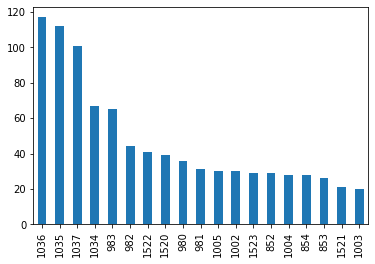

In [7]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

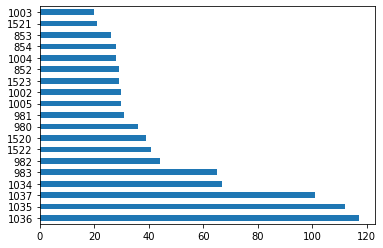

In [8]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh()

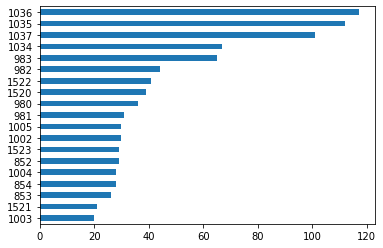

In [9]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

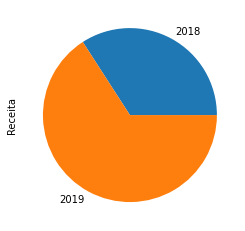

In [21]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [22]:
#Total vendas por cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

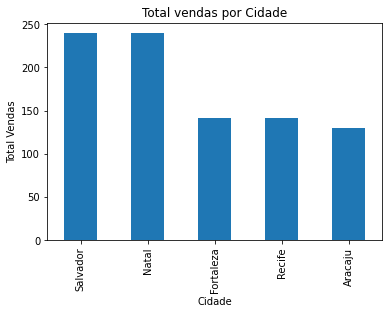

In [23]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

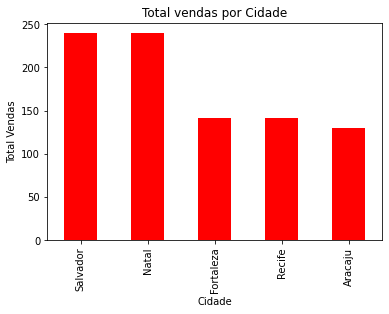

In [24]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [33]:
#Alterando o estilo
plt.style.use("dark_background")

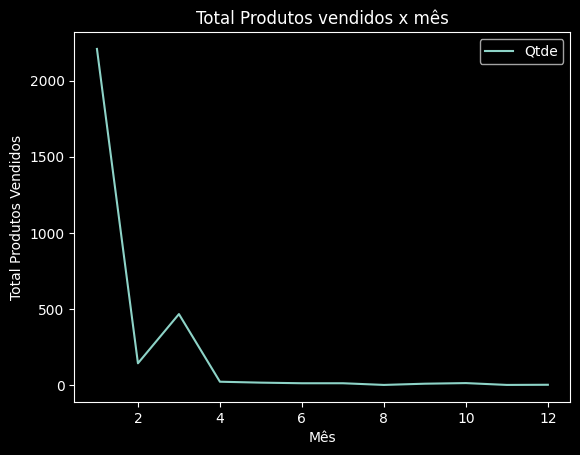

In [34]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [35]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [36]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [37]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

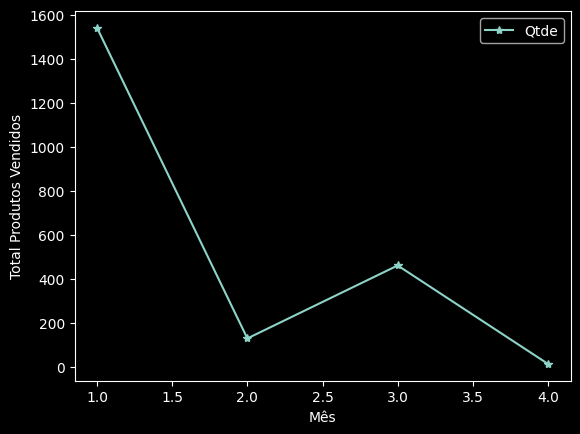

In [39]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "*")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

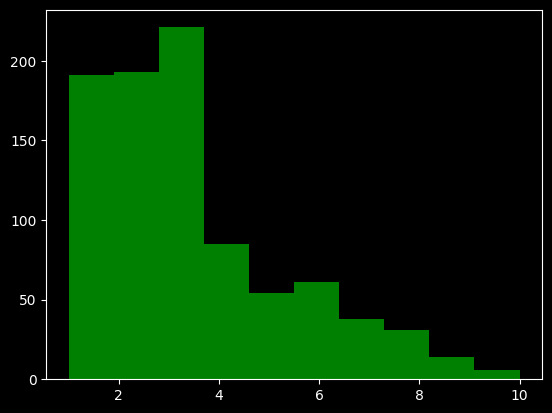

In [42]:
#Histograma
plt.hist(df["Qtde"], color="green");

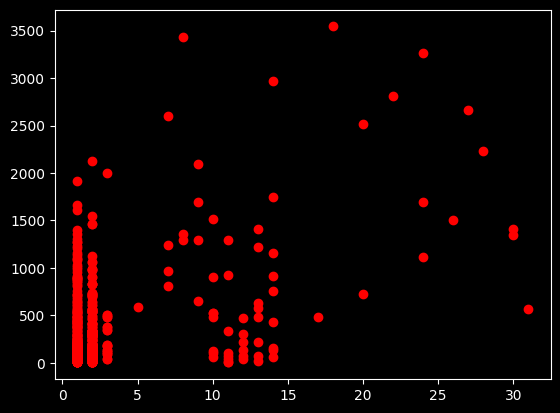

In [44]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"], color="red");

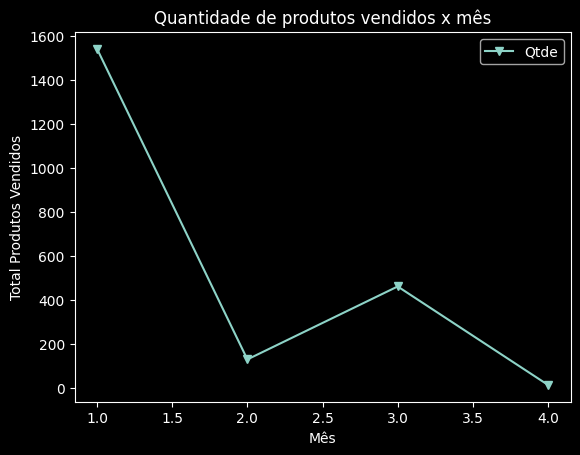

In [45]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico_QTDExMES.png")